- 주식 지수와 관심종목들 비교 
- 1일, 5일, 10일 전 등락률 비교
- Charts 작성
- 등락률 = (오늘종가-전 종가 / 전 종가) * 100

In [56]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [57]:
import pandas as pd

In [58]:
# api 
import FinanceDataReader as fdr

global_name_list = [
    'IXIC',
    'MU',
    # 'TSLA',
    'MSFT'
]

global_df_list = []

In [59]:

for name in global_name_list:
    global_df_list.append(fdr.DataReader(symbol=name, start='2024'))


In [60]:

for df in global_df_list:
    df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2024-01-02 to 2024-12-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       245 non-null    float64
 1   High       245 non-null    float64
 2   Low        245 non-null    float64
 3   Close      245 non-null    float64
 4   Volume     245 non-null    int64  
 5   Adj Close  245 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.4 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2024-01-02 to 2024-12-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       245 non-null    float64
 1   High       245 non-null    float64
 2   Low        245 non-null    float64
 3   Close      245 non-null    float64
 4   Volume     245 non-null    int64  
 5   Adj Close  245 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.4 KB
<class 'pand

지수와 종목 종가 비교
지수와 종목 1등락률 비교
지수와 종목 5등락률 비교
지수와 종목 10등락률 비교

In [61]:
df_plot = pd.DataFrame()
for num, (df, name) in enumerate(zip(global_df_list, global_name_list)):
    # 1일 등락률
    df_plot[f'{name}_1day'] = (df['Close'] - df['Close'].shift(periods=1)) / df['Close'].shift(periods=1) * 100
    # 5일 등락률
    df_plot[f'{name}_5day'] = (df['Close'] - df['Close'].shift(periods=5)) / df['Close'].shift(periods=5) * 100
    # 10일 등락률
    df_plot[f'{name}_10day'] = (df['Close'] - df['Close'].shift(periods=10)) / df['Close'].shift(periods=10) * 100

df_plot

,IXIC_1day,IXIC_5day,IXIC_10day,MU_1day,MU_5day,MU_10day,MSFT_1day,MSFT_5day,MSFT_10day
2024-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-03,-1.176562,NaN,NaN,-0.097151,NaN,NaN,-0.072799,NaN,NaN
2024-01-04,-0.561328,NaN,NaN,0.547042,NaN,NaN,-0.717756,NaN,NaN
2024-01-05,0.094902,NaN,NaN,0.894690,NaN,NaN,-0.051640,NaN,NaN
2024-01-08,2.201168,NaN,NaN,1.797484,NaN,NaN,1.887152,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-12-13,0.119987,0.337120,3.686880,4.336321,1.314621,4.645230,-0.509389,0.834137,5.622727
2024-12-16,1.240394,2.215170,3.967962,5.619514,5.290802,9.852865,0.965861,1.248825,4.782121
2024-12-17,-0.321356,2.142608,3.224441,0.314055,10.703364,8.774041,0.635531,2.510546,5.394244
2024-12-18,-3.562429,-3.205414,-1.735129,-4.327806,1.802865,0.678299,-3.756101,-2.583571,-0.006858


In [62]:

serise_global_close_list = []
for df in global_df_list:
    serise_global_close_list.append((df['Close'] / df['Close'].iloc[0]) * 100)


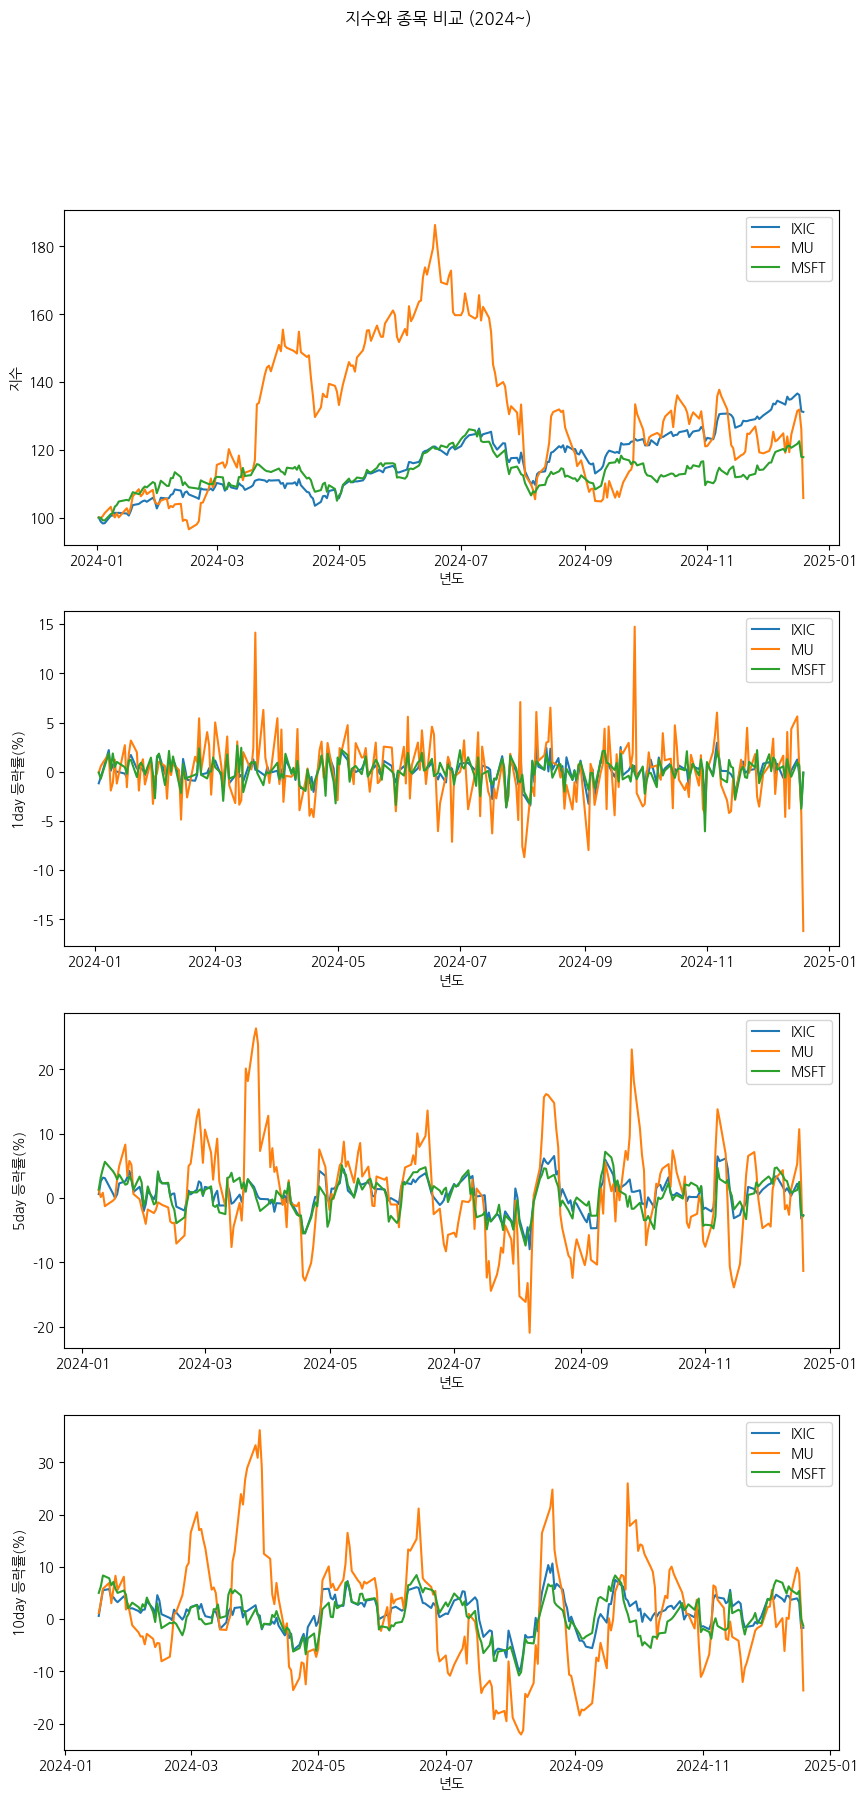

In [63]:
# fig, axes = plt.subplots(2,2,figsize=(14,10)) # 외곽 사이즈

fig, axes = plt.subplots(4,1,figsize=(10,20), dpi=100) # 외곽 사이즈

fig.suptitle('지수와 종목 비교 (2024~)')
# fig.supxlabel('super x')
# fig.supylabel('super y')
for num, (global_index, global_name) in enumerate(zip(serise_global_close_list, global_name_list)):
    axes[0].plot(global_index.index, global_index, label=global_name)
    # axes[num].set_title('axes first')
axes[0].set_xlabel('년도')
axes[0].set_ylabel('지수')
axes[0].legend()

# 그래프 그리기
periods = ['1day', '5day', '10day']
for idx, period in enumerate(periods, 1):
    for name in global_name_list:
        col_name = f'{name}_{period}'
        axes[idx].plot(df_plot.index, df_plot[col_name], label=name)
    
    axes[idx].set_xlabel('년도')
    axes[idx].set_ylabel(f'{period} 등락률(%)')
    axes[idx].legend()


# plt.tight_layout()
plt.show()
